<a href="https://colab.research.google.com/github/pitaconsumer/Purple_District/blob/main/Purple_District_NORC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#LOAD NORC data with URL: https://drive.google.com/file/d/14MCk1uaFD6Ese6btEb-lhe21y3u7O19T/view?ts=603aaddf
url = https://drive.google.com/file/d/14MCk1uaFD6Ese6btEb-lhe21y3u7O19T/view?ts=603aaddf
data = pd.read_csv(url)
data.head()

In [28]:
#LOAD NORC Data manually
norc = pd.read_csv('GSS7218_R3.csv')
norc.head()

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,OCC,PRESTIGE,WRKSLF,WRKGOVT,COMMUTE,INDUSTRY,OCC80,PRESTG80,INDUS80,INDUS07,OCCONET,FOUND,OCC10,OCCINDV,OCCSTATUS,OCCTAG,PRESTG10,PRESTG105PLUS,INDUS10,INDSTATUS,INDTAG,MARITAL,MARTYPE,AGEWED,DIVORCE,WIDOWED,SPWRKSTA,SPHRS1,SPHRS2,SPEVWORK,COWRKSTA,COWRKSLF,COEVWORK,COHRS1,...,POPESPKY,POLHITOY,LETDIE1Y,DEATH,BALLOT,VERSION,ISSP,FORMWT,SAMPCODE,SAMPLE,OVERSAMP,PHASE,SPANSELF,SPANINT,SPANENG,RES2006,RES2008,RES2010,RES2012,CSHUTYP06,CSHUTYP08,CSHUTYP10,CSHUTYP12,HLTHSTRT,HUADD,HUADDWHY,DWELLPRE,KIDSINHH,RESPOND,INCUSPOP,NEISAFE,RLOOKS,RGROOMED,RWEIGHT,RHLTHEND,WTSS,WTSSNR,WTSSALL,VSTRAT,VPSU
0,1972,1,1,-1,-1,0,205,50,2,0,-1,609,0,0,0,0,0,1,520,1,3,1,45,49,5170,3,1,5,0,0,0,0,0,-1,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.4446,-1.0,-1.0
1,1972,2,5,-1,-1,1,441,45,2,0,-1,338,0,0,0,0,0,1,7700,1,3,1,50,62,6470,3,1,1,0,21,2,0,7,-1,-1,2,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.8893,-1.0,-1.0
2,1972,3,2,-1,-1,0,270,44,2,0,-1,718,0,0,0,0,0,0,4920,-1,6,2,49,69,7070,6,2,1,0,20,2,0,1,-1,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.8893,-1.0,-1.0
3,1972,4,1,-1,-1,0,1,57,2,0,-1,319,0,0,0,0,0,1,800,1,3,1,60,85,5170,3,1,1,0,24,2,0,1,-1,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.8893,-1.0,-1.0
4,1972,5,7,-1,-1,1,385,40,2,0,-1,448,0,0,0,0,0,1,5020,1,3,1,31,21,6680,3,1,1,0,22,2,0,3,-1,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.8893,-1.0,-1.0


In [29]:
print(list(norc.columns))

['YEAR', 'ID', 'WRKSTAT', 'HRS1', 'HRS2', 'EVWORK', 'OCC', 'PRESTIGE', 'WRKSLF', 'WRKGOVT', 'COMMUTE', 'INDUSTRY', 'OCC80', 'PRESTG80', 'INDUS80', 'INDUS07', 'OCCONET', 'FOUND', 'OCC10', 'OCCINDV', 'OCCSTATUS', 'OCCTAG', 'PRESTG10', 'PRESTG105PLUS', 'INDUS10', 'INDSTATUS', 'INDTAG', 'MARITAL', 'MARTYPE', 'AGEWED', 'DIVORCE', 'WIDOWED', 'SPWRKSTA', 'SPHRS1', 'SPHRS2', 'SPEVWORK', 'COWRKSTA', 'COWRKSLF', 'COEVWORK', 'COHRS1', 'COHRS2', 'SPOCC', 'SPPRES', 'SPWRKSLF', 'SPIND', 'SPOCC80', 'SPPRES80', 'SPIND80', 'SPOCC10', 'SPOCCINDV', 'SPOCCSTATUS', 'SPOCCTAG', 'SPPRES10', 'SPPRES105PLUS', 'SPIND10', 'SPINDSTATUS', 'SPINDTAG', 'COOCC10', 'COIND10', 'PAOCC16', 'PAPRES16', 'PAWRKSLF', 'PAIND16', 'PAOCC80', 'PAPRES80', 'PAIND80', 'PAOCC10', 'PAOCCINDV', 'PAOCCSTATUS', 'PAOCCTAG', 'PAPRES10', 'PAPRES105PLUS', 'PAIND10', 'PAINDSTATUS', 'PAINDTAG', 'MAOCC80', 'MAPRES80', 'MAWRKSLF', 'MAIND80', 'MAOCC10', 'MAOCCINDV', 'MAOCCSTATUS', 'MAOCCTAG', 'MAPRES10', 'MAPRES105PLUS', 'MAIND10', 'MAINDSTATUS'

In [31]:
norc.info()
#We've got 6,110 columns that are largely int64 datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Columns: 6110 entries, YEAR to VPSU
dtypes: float64(1006), int64(5104)
memory usage: 163.8 MB


Variables of interest: 'WORKGOV' indicates if works for government or private employee. We could explore relation of parent education with voter. We see that father's highest degree is 'PADAG'--rather than looking at 'PAEDUC', which is highest number of high school education. According to Codebook, variable descriptions:  https://gssdataexplorer.norc.org/variables/vfilter 

In [32]:
norc.describe()

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,OCC,PRESTIGE,WRKSLF,WRKGOVT,COMMUTE,INDUSTRY,OCC80,PRESTG80,INDUS80,INDUS07,OCCONET,FOUND,OCC10,OCCINDV,OCCSTATUS,OCCTAG,PRESTG10,PRESTG105PLUS,INDUS10,INDSTATUS,INDTAG,MARITAL,MARTYPE,AGEWED,DIVORCE,WIDOWED,SPWRKSTA,SPHRS1,SPHRS2,SPEVWORK,COWRKSTA,COWRKSLF,COEVWORK,COHRS1,...,POPESPKY,POLHITOY,LETDIE1Y,DEATH,BALLOT,VERSION,ISSP,FORMWT,SAMPCODE,SAMPLE,OVERSAMP,PHASE,SPANSELF,SPANINT,SPANENG,RES2006,RES2008,RES2010,RES2012,CSHUTYP06,CSHUTYP08,CSHUTYP10,CSHUTYP12,HLTHSTRT,HUADD,HUADDWHY,DWELLPRE,KIDSINHH,RESPOND,INCUSPOP,NEISAFE,RLOOKS,RGROOMED,RWEIGHT,RHLTHEND,WTSS,WTSSNR,WTSSALL,VSTRAT,VPSU
count,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.0,3513.0,3513.000000,3513.0,3513.0,3513.0,3513.0,3513.0,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3513.0,3513.000000,3513.000000,3513.0,3513.000000,3513.000000,3513.000000,3513.000000,3513.0,3513.0,3513.0,3513.0,...,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.000000,3512.000000,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.0,3512.00000,3512.0,3512.0
mean,1972.653572,715.074580,3.525761,10.415599,-0.459721,0.530885,441.018787,34.700541,1.736123,0.0,-1.0,496.089098,0.0,0.0,0.0,0.0,0.0,0.663535,5052.288642,0.265585,3.879021,1.407059,34.299174,35.695417,5378.516937,3.862795,1.402790,1.768005,0.0,19.549103,1.576715,0.0,2.393396,8.993168,-0.657558,0.358383,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.465831,1.540718,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.99451,-1.0,-1.0
std,0.672304,465.131261,2.657559,19.751685,5.197099,0.724785,301.348147,17.726222,0.782130,0.0,0.0,325.808655,0.0,0.0,0.0,0.0,0.0,0.472567,3146.066974,0.931786,1.646213,0.618596,19.502253,27.597818,3386.520924,1.637393,0.610988,1.401464,0.0,9.689687,1.166832,0.0,2.774473,19.397193,4.434831,0.663006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.832953,0.498410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37502,0.0,0.0
min,1972.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.44460,-1.0,-1.0
25%,1972.000000,293.000000,1.000000,-1.000000,-1.000000,0.000000,226.000000,24.000000,2.000000,0.0,-1.0,189.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2540.000000,-1.000000,3.000000,1.000000,25.000000,15.000000,2290.000000,3.000000,1.000000,1.000000,0.0,18.000000,1.000000,0.0,0.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.88930,-1.0,-1.0
50%,1973.000000,681.000000,2.000000,-1.000000,-1.000000,0.000000,382.000000,36.000000,2.000000,0.0,-1.0,607.000000,0.0,0.0,0.0,0.0,0.0,1.000000,5020.000000,1.000000,3.000000,1.000000,36.000000,29.000000,6170.000000,3.000000,1.000000,1.000000,0.0,21.000000,2.000000,0.0,1.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,107.000000,2.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.91450,-1.0,-1.0
75%,1973.000000,1120.000000,7.000000,20.000000,-1.000000,1.000000,692.000000,47.000000,2.000000,0.0,-1.0,808.000000,0.0,0.0,0.0,0.0,0.0,1.000000,7750

In [53]:
norc.value_counts('PADEG')

PADEG
0    1756
1     618
7     440
9     254
8     226
3     123
4      85
2      11
dtype: int64

In [51]:
norc['PADEG'].mean()

2.426131511528608

AttributeError: ignored

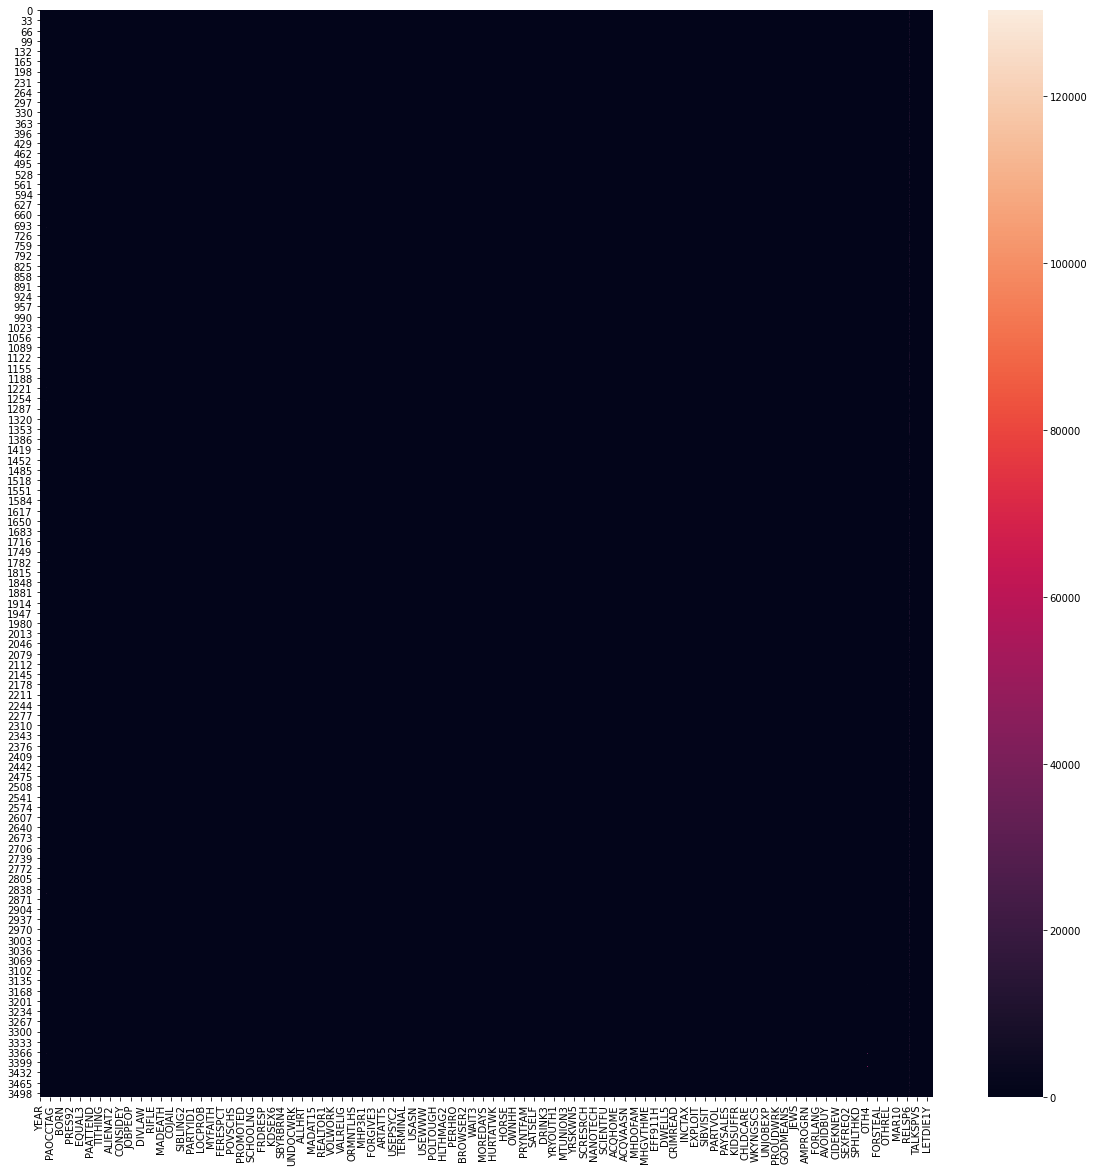

In [40]:
#Plot columns as Heat Map
plt.figure(figsize=(20,20))
sns.heatmap(norc).isna()
plt.show()

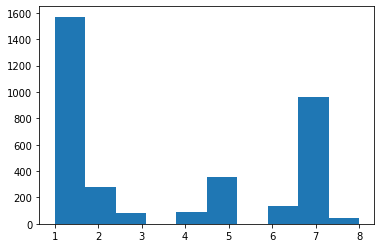

In [41]:
#Plot Work Force status 
plt.hist(norc['WRKSTAT'])
plt.show()

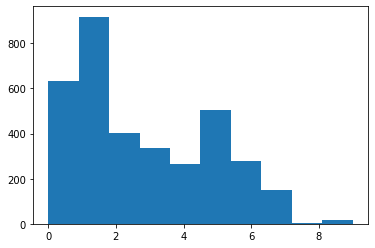

In [42]:
#Plot party affiliation status
plt.hist(norc['PARTYID'])
plt.show()

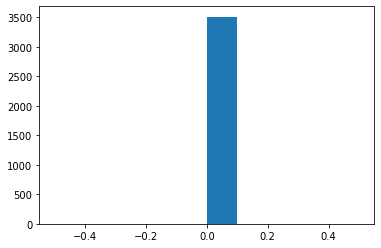

In [43]:
#Plot 'CHOICES', which asks whether 'Political parties give real policy choices.'
plt.hist(norc['CHOICES'])
plt.show()


Responses are '0' or '1'.

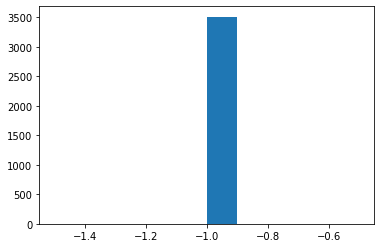

In [45]:
#PLOT 'DEMTODAY', which asks "How well democracy work in America " vs. "DEM10FUT": in future?
plt.hist(norc['DEMTODAY'])
plt.show()

In [50]:
#What is the number of respondents in each party affiliation? "PARTYID"
## There's 10 types of affiliations!
norc["PARTYID"].value_counts()

1    918
0    632
5    504
2    401
3    337
6    280
4    267
7    152
9     19
8      3
Name: PARTYID, dtype: int64

Ranked by largest affiliation:
1- 'Not Strong Democrat'
0- 'Strong Democrat'
5- 'Not Strong Rebplican'
*******************
0	Strong democrat
1	Not str democrat
2	Ind,near dem
3	Independent
4	Ind,near rep
5	Not str republican
6	Strong republican
7	Other party
8	Don't know
9	No answer

Variable for Gender:
1 - Male
2 - Female
https://gssdataexplorer.norc.org/variables/81/vshow

In [49]:
#How does a value break by respondent's gender and party? 
norc.groupby(["SEX", "PARTYID"])["CHOICES"].mean()

SEX  PARTYID
1    0          0.0
     1          0.0
     2          0.0
     3          0.0
     4          0.0
     5          0.0
     6          0.0
     7          0.0
     9          0.0
2    0          0.0
     1          0.0
     2          0.0
     3          0.0
     4          0.0
     5          0.0
     6          0.0
     7          0.0
     8          0.0
     9          0.0
Name: CHOICES, dtype: float64

# New Section: Uploading from local file system

In [27]:
#Uploading files from your local file system
##files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GSS7218_R3.csv to GSS7218_R3.csv


KeyboardInterrupt: ignored

In [15]:
from google.colab import files

with open('GSS7218_R3.csv', 'w') as f:
  f.write('NORC')

files.download('GSS7218_R3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
df = pd.read_csv('GSS7218_R3.csv')
df

,NORC


In [17]:
df.tail()

,NORC


In [14]:
# print(os.getcwd())

In [8]:
#Access Drive file containing NORC data 
import urllib.request

req = urllib.request.Request('https://drive.google.com/https://doc-10-1k-docs.googleusercontent.com/docs/securesc/5lhft1aun996mjp0pmhj0ssmkl65664n/hra2pg2rd0jcokpoi2r6e1lfi8s3btlj/1614540525000/14131790862529985455/15044161899268707065/14MCk1uaFD6Ese6btEb-lhe21y3u7O19T?e=download&authuser=0&nonce=ttt483i2a1flq&user=15044161899268707065&hash=744nc4n9m369ub7upspbof1g6hgp93tv')
with urllib.request.urlopen(req) as response:
   the_page = response.read()


HTTPError: ignored

In [12]:
#Access file from local
df_norc = pd.read_csv('⁨/Users⁩/⁨mehrunisaqayyum⁩/Downloads/⁩GSS7218_R3.csv')
df_norc

FileNotFoundError: ignored